In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm.auto import tqdm

In [2]:
def monte_carlo(S0, K, r, sigma, T, N, M):
    dt = T / N  # Time step size
    # Simulate paths
    S = np.zeros((M, N + 1))
    S[:, 0] = S0  # Initial price
    for t in range(1, N + 1):
        Z = np.random.standard_normal(M)  # Random numbers
        S[:, t] = S[:, t - 1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * Z)
    
    # Calculate the payoff at maturity
    payoff = np.maximum(S[:, -1] - K, 0)
    
    # Discount back to present value
    option_price = np.exp(-r * T) * np.mean(payoff)
    
    return option_price

In [3]:
K = 100.0
r = 0.05
sigma = 0.1
T = [0.0, 1.0]
N = 100
S = [80.0, 160.0]
M = 100000

prices = []

for s in tqdm(np.linspace(S[0], S[1], N)):
    price_at_s = []
    for n, t in enumerate(np.linspace(T[1], T[0], N)):
        price_at_s.append(monte_carlo(s, K, r, sigma, t, N-n, M))
    
    prices.append(price_at_s)

  0%|          | 0/100 [00:00<?, ?it/s]

In [7]:
prices = np.array(prices)

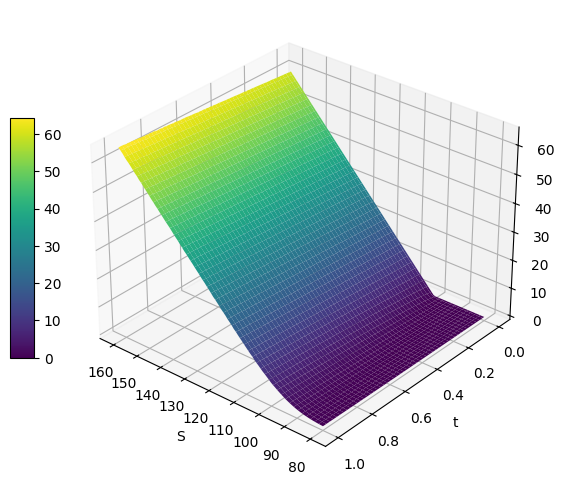

In [39]:
s_grid = np.linspace(S[0], S[1], N)
t_grid = np.linspace(T[1], T[0], N)
s_grid_mesh, t_grid_mesh = np.meshgrid(s_grid, t_grid)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d', elev=30, azim=130)
surf = ax.plot_surface(s_grid_mesh, t_grid_mesh, prices.T, cmap='viridis', edgecolor='none')
cbaxes = fig.add_axes([0.15, 0.3, 0.03, 0.4])
fig.colorbar(surf, shrink=0.5, aspect=10, cax=cbaxes)
ax.set_xlabel('S')
ax.set_ylabel('t')
ax.set_zlabel('u')
plt.savefig('plots/monte_carlo_solution.png')
plt.show()

In [40]:
np.save('simulations/monte_carlo_european_call.npy', prices)

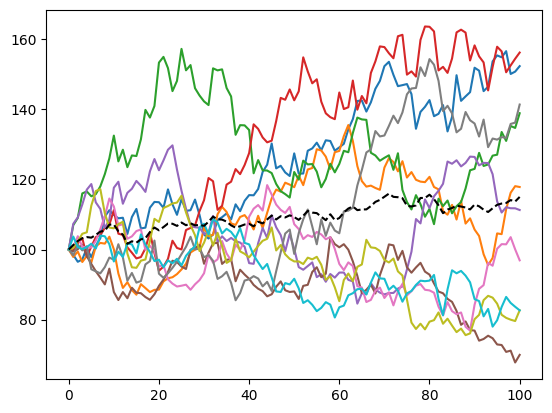

In [2]:
mu = 0.02
n = 100
dt = 0.1
x0 = 100

sigma = np.full(10, 0.1)

x = np.exp(
    (mu - sigma ** 2 / 2) * dt + sigma * np.random.normal(0, np.sqrt(dt), size=(len(sigma), n)).T
)
x = np.vstack([np.ones(len(sigma)), x])
x = x0 * x.cumprod(axis=0)

plt.plot(x)
plt.plot([np.average(av) for av in x], 'k--')
plt.show()

In [39]:
df = pd.read_csv('option_data/aapl_2021_2023.csv', sep=r'\s*,\s*', engine='python')
# plt.plot(df.sort_values(by='[QUOTE_UNIXTIME]')['[QUOTE_UNIXTIME]'], df.sort_values(by='[QUOTE_UNIXTIME]')['[UNDERLYING_LAST]'])
print(len(df))

548163


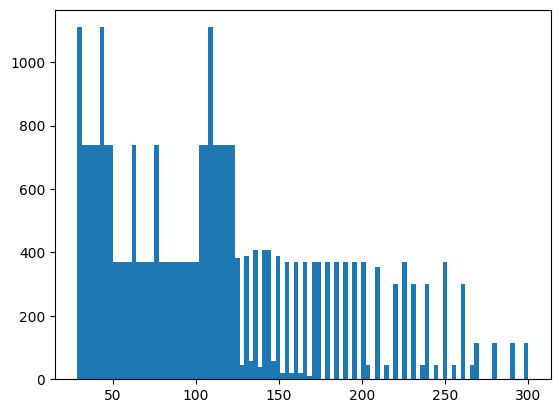

,[QUOTE_UNIXTIME],[QUOTE_READTIME],[QUOTE_DATE],[QUOTE_TIME_HOURS],[UNDERLYING_LAST],[EXPIRE_DATE],[EXPIRE_UNIX],[DTE],[C_DELTA],[C_GAMMA],...,[P_LAST],[P_DELTA],[P_GAMMA],[P_VEGA],[P_THETA],[P_RHO],[P_IV],[P_VOLUME],[STRIKE_DISTANCE],[STRIKE_DISTANCE_PCT]
19129,1654113600,2022-06-01 16:00,2022-06-01,16.0,148.70,2022-06-17,1655496000,16.0,0.99791,0.00004,...,0.01,-0.00028,0.00005,0.00004,-0.00174,0.00000,2.36632,0.0,119.9,0.807
19130,1654113600,2022-06-01 16:00,2022-06-01,16.0,148.70,2022-06-17,1655496000,16.0,0.99751,0.00008,...,0.01,-0.00032,0.00001,0.00030,-0.00153,0.00000,2.30545,0.0,118.7,0.798
19131,1654113600,2022-06-01 16:00,2022-06-01,16.0,148.70,2022-06-17,1655496000,16.0,0.99713,0.00014,...,0.02,-0.00008,0.00005,0.00035,-0.00184,0.00000,2.24713,0.0,117.4,0.790
19132,1654113600,2022-06-01 16:00,2022-06-01,16.0,148.70,2022-06-17,1655496000,16.0,0.99736,0.00010,...,0.02,0.00000,0.00003,0.00061,-0.00142,0.00000,2.19239,0.0,116.2,0.781
19133,1654113600,2022-06-01 16:00,2022-06-01,16.0,148.70,2022-06-17,1655496000,16.0,0.99797,0.00004,...,0.09,-0.00016,0.00003,-0.00006,-0.00161,-0.00041,2.13823,0.0,114.9,0.773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506298,1630440000,2021-08-31 16:00,2021-08-31,16.0,151.82,2022-06-17,1655496000,290.0,0.08831,0.00394,...,93.90,-0.84731,0.00213,0.27739,-0.01553,-0.74502,0.32306,0.0,73.2,0.482
506299,1630440000,2021-08-31 16:00,2021-08-31,16.0,151.82,2022-06-17,1655496000,290.0,0.07902,0.00359,...,97.55,-0.84542,0.00182,0.27641,-0.01562,-0.73070,0.33647,0.0,78.2,0.515
506300,1630440000,2021-08-31 16:00,2021-08-31,16.0,151.82,2022-06-17,1655496000,290.0,0.06455,0.00301,...,94.50,-0.84119,0.00115,0.27340,-0.01668,-0.69370,0.36085,0.0,88.2,0.581
506301,1630440000,2021-08-31 16:00,2021-08-31,16.0,151.82,2022-06-17,1655496000,290.0,0.05276,0.00254,...,98.55,-0.83210,0.00083,0.27729,-0.01839,-0.67757,0.39052,0.0,98.2,0.647


In [50]:
df_ = df[df['[EXPIRE_DATE]'] == '2022-06-17']
plt.hist(df_['[STRIKE]'], bins=100)
plt.show()
df_
# df.groupby('[EXPIRE_DATE]').size().sort_values(ascending=False)

In [7]:
dfs = [pd.read_csv('option_data/aapl_eod_2020-e0djad/aapl_eod_202001.txt', sep=r'\s*,\s*', engine='python') for x in range(202001, 202013)]
df = pd.concat(dfs)

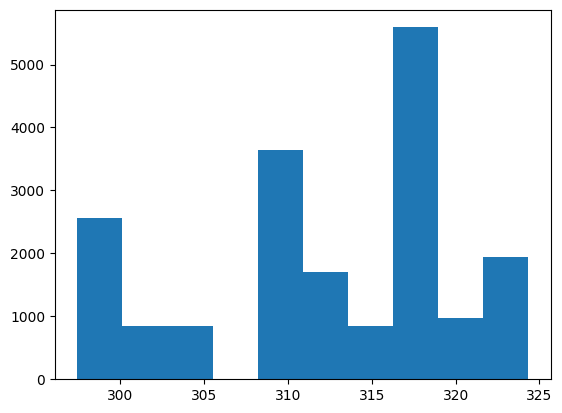

In [22]:
df = df[df['[EXPIRE_DATE]'] == '2020-02-21']

plt.hist(df['[UNDERLYING_LAST]'])
plt.show()